# Folder organization

This folder is divided like 

```
└── trabalho
    ├── dados_manha
    │   ├── acc_frf_motor.txt
    │   ├── acc_psd_motor.txt
    │   └── acc_tempo_motor.txt
    ├── plot_original_data.ipynb
    └── massa4
```

# Show the readed values on graphs

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def readlines(filename: str, header: int = 0) -> np.ndarray:
    with open(filename, "r") as file:
        alllines = file.readlines()
    for i in range(header):
        alllines.pop(0)
    if len(alllines[-1]) < 5:
        alllines.pop(-1)
    for i, line in enumerate(alllines):
        alllines[i] = line.replace("\n", "").split("\t")
        for j, val in enumerate(alllines[i]):    
            alllines[i][j] = float(val)
    return np.array(alllines)

### File ```acc_frf_motor.txt```

Text(0, 0.5, 'Fase $\\arg \\left(\\dfrac{\\ddot{x}}{f}\\right)$ (graus)')

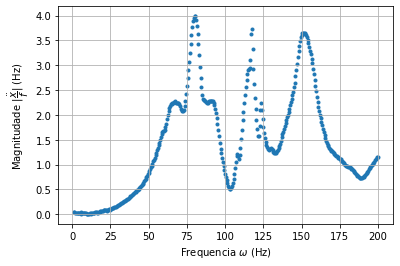

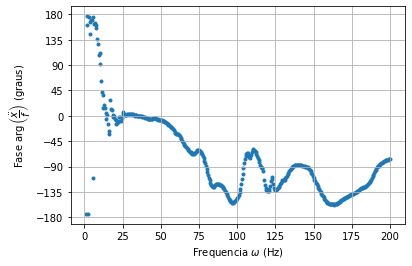

In [18]:
filename = "dados_manha/acc_frf_motor.txt"
data = readlines(filename, header=6)
frequency = data[:, 0]  # Hz
magnitude = data[:, 1]  # (m/s^2)/N
phase = data[:, 2]  # degree
fig = plt.figure()
plt.scatter(frequency, magnitude, marker=".")
plt.grid()
plt.xlabel(r"Frequencia $\omega$ (Hz)")
plt.ylabel(r"Magnitudade $\left|\dfrac{\ddot{x}}{f}\right|$ (Hz)")

fig = plt.figure()
plt.scatter(frequency, phase, marker=".")
plt.grid()
plt.gca().set_yticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
plt.xlabel(r"Frequencia $\omega$ (Hz)")
plt.ylabel(r"Fase $\arg \left(\dfrac{\ddot{x}}{f}\right)$ (graus)")

### File ```acc_psd_motor.txt``` 

Text(0, 0.5, 'Magnitudade dB $\\log_{10}\\left|\\dfrac{\\ddot{x}}{f}\\right|$ (Hz)')

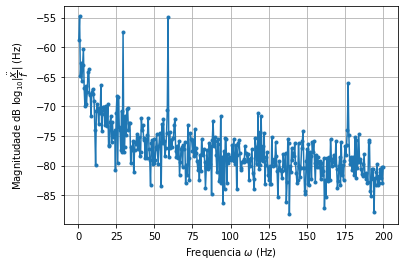

In [13]:
filename = "dados_manha/acc_psd_motor.txt"
data = readlines(filename, header=5)
frequency = data[:, 0]  # Hz
magnitude = data[:, 1]  # dB, 0 dB = 1 N^2/Hz
fig = plt.figure()
plt.plot(frequency, magnitude, marker=".")
plt.grid()
plt.xlabel(r"Frequencia $\omega$ (Hz)")
plt.ylabel(r"Magnitudade dB $\log_{10}\left|\dfrac{\ddot{x}}{f}\right|$ (Hz)")

### File ```acc_tempo_motor.txt```

Text(0, 0.5, 'Aceleração $\\ddot{x}$ (m/s^2)')

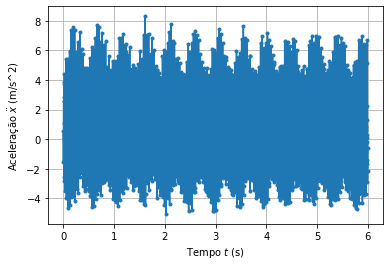

In [12]:
filename = "dados_manha/acc_tempo_motor.txt"
data = readlines(filename, header=5)
time = data[:, 0]  # s
acce = data[:, 1]  # m/s^2
fig = plt.figure()
plt.plot(time, acce, marker=".")
plt.grid()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Aceleração $\ddot{x}$ (m/s^2)")